<a href="https://colab.research.google.com/github/tayfununal/Normalizing-Flows/blob/main/coding_tutorial_bijectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

tfd = tfp.distributions
tfb = tfp.bijectors

# Ex 1

In [2]:
z = tf.constant([1., 2., 3.])

In [5]:
scale = tfb.Scale(2.)

scale_forward = scale.forward(z)
scale_inverse = scale.inverse(z)

print(scale_forward, scale_inverse)

tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32) tf.Tensor([0.5 1.  1.5], shape=(3,), dtype=float32)


# Ex 2

In [6]:
z = tf.constant([1., 2., 3.])

In [10]:
scale = tfb.Scale(2.)
shift = tfb.Shift(1.)

scale_and_shift = tfb.Chain([shift, scale])

print(scale_and_shift.forward(z))
print(scale_and_shift.inverse(z))

tf.Tensor([3. 5. 7.], shape=(3,), dtype=float32)
tf.Tensor([0.  0.5 1. ], shape=(3,), dtype=float32)


# Ex 3

In [28]:
 normal = tfd.Normal(loc=0., scale=1.)

(array([ 20.,  57., 125., 203., 235., 199., 110.,  37.,  12.,   2.]),
 array([-2.6701388 , -2.0591378 , -1.4481366 , -0.8371355 , -0.22613439,
         0.3848667 ,  0.99586785,  1.606869  ,  2.21787   ,  2.8288713 ,
         3.4398723 ], dtype=float32),
 <a list of 10 Patch objects>)

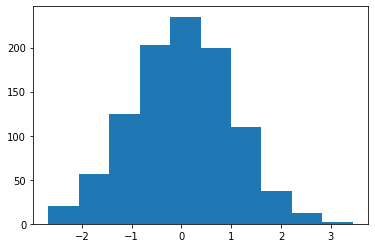

In [29]:
z = normal.sample(1000)
plt.hist(z)

(array([ 20.,  57., 125., 203., 235., 199., 110.,  37.,  12.,   2.]),
 array([-4.3402777, -3.1182754, -1.8962733, -0.674271 ,  0.5477312,
         1.7697334,  2.9917357,  4.213738 ,  5.43574  ,  6.6577425,
         7.8797445], dtype=float32),
 <a list of 10 Patch objects>)

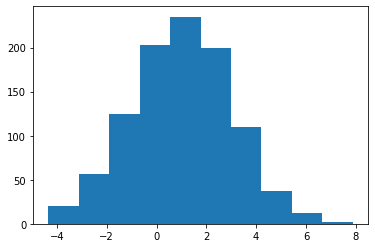

In [30]:
scale = tfb.Scale(2.)
shift = tfb.Shift(1.)

scale_and_shift = tfb.Chain([shift, scale])

targets = scale_and_shift.forward(z)
plt.hist(targets)

# Ex 4

In [40]:
uniform = tfd.Uniform(low=0., high=1.)

(array([ 95.,  81., 106.,  97., 113., 104., 106.,  92.,  94., 112.]),
 array([0.00495398, 0.1041833 , 0.20341262, 0.30264196, 0.40187126,
        0.5011006 , 0.60032994, 0.6995593 , 0.79878855, 0.8980179 ,
        0.9972472 ], dtype=float32),
 <a list of 10 Patch objects>)

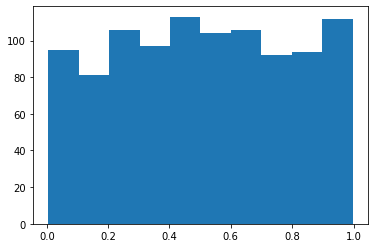

In [41]:
z = uniform.sample(1000)

plt.hist(z)

(array([ 95.,  81., 106.,  97., 113., 104., 106.,  92.,  94., 112.]),
 array([ 2.0495398,  3.041833 ,  4.0341263,  5.0264196,  6.018713 ,
         7.011006 ,  8.0033   ,  8.995592 ,  9.987885 , 10.980179 ,
        11.972472 ], dtype=float32),
 <a list of 10 Patch objects>)

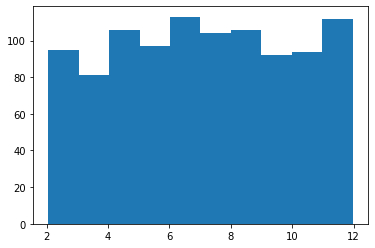

In [42]:
scale = tfb.Scale(10.)
shift = tfb.Shift(2.)

scale_and_shift = tfb.Chain([shift, scale])

targets = scale_and_shift.forward(z)
plt.hist(targets)

(array([108., 100.,  93., 106., 110.,  87., 119., 102.,  94.,  81.]),
 array([2.5033951e-04, 1.0011218e-01, 1.9997402e-01, 2.9983586e-01,
        3.9969769e-01, 4.9955952e-01, 5.9942138e-01, 6.9928318e-01,
        7.9914504e-01, 8.9900684e-01, 9.9886870e-01], dtype=float32),
 <a list of 10 Patch objects>)

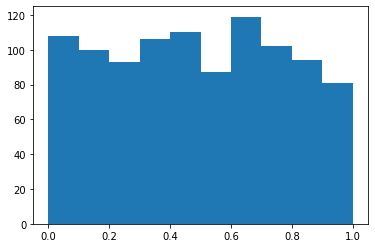

In [39]:
scale_and_shift = tfb.Chain([shift, scale])

targets_inverse = scale_and_shift.inverse(targets)
plt.hist(targets_inverse)